In [1]:
## 💻 Laptop Price Prediction Project
#This notebook covers the entire pipeline for predicting laptop prices using machine learning, from data ingestion to model deployment preparation.

#📌 Dataset: Contains specifications of laptops and their prices in Euros.

#🎯 Goal: Build a model that predicts price based on laptop specifications.


In [2]:
print("Part 1: Data Ingestion")
print("Load the dataset and verify its integrity for analysis.")
print("Steps")
print("Load the dataset into a DataFrame.")
print("Inspect the number of rows and columns, column names, and data types.")
print("Check for missing values and duplicates.")

Part 1: Data Ingestion
Load the dataset and verify its integrity for analysis.
Steps
Load the dataset into a DataFrame.
Inspect the number of rows and columns, column names, and data types.
Check for missing values and duplicates.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle


In [4]:
# 1.Data Ingestion
# Loading the Data set
df = pd.read_csv('/Volumes/SAYAN/Cuvette-Data-Science/Machine_Learning/Mini_Project/Data/laptop_price - dataset.csv')




In [5]:
# Basic info
print(df.shape)
df.info()
df.head()

(1275, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), ob

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [6]:
# Check for missing (null) values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_rows}")


Number of duplicated rows: 0


In [8]:
print(df.columns.tolist())


['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)']


In [9]:


print(" 2.Data Understanding and Exploration (EDA)")
print("Gain insights into the dataset, identify relationships, and detect patterns or anomalies.")
print("Steps")

print("Univariate Analysis")
print("Explore the distribution of numerical features like Price (Euro), Inches, RAM (GB), Weight (kg), and CPU_Frequency.")

print("Examine categorical features like Company, TypeName, CPU_Company  for frequency distributions.")
print("Bivariate Analysis")
print("Analyze relationships between features and the target variable (Price (Euro)).")
print("Use scatter plots for numerical features and box plots for categorical features.")
print("Multivariate Analysis")
print("Explore interactions between multiple features using heatmaps, pair plots, or other visualization techniques.")


 2.Data Understanding and Exploration (EDA)
Gain insights into the dataset, identify relationships, and detect patterns or anomalies.
Steps
Univariate Analysis
Explore the distribution of numerical features like Price (Euro), Inches, RAM (GB), Weight (kg), and CPU_Frequency.
Examine categorical features like Company, TypeName, CPU_Company  for frequency distributions.
Bivariate Analysis
Analyze relationships between features and the target variable (Price (Euro)).
Use scatter plots for numerical features and box plots for categorical features.
Multivariate Analysis
Explore interactions between multiple features using heatmaps, pair plots, or other visualization techniques.


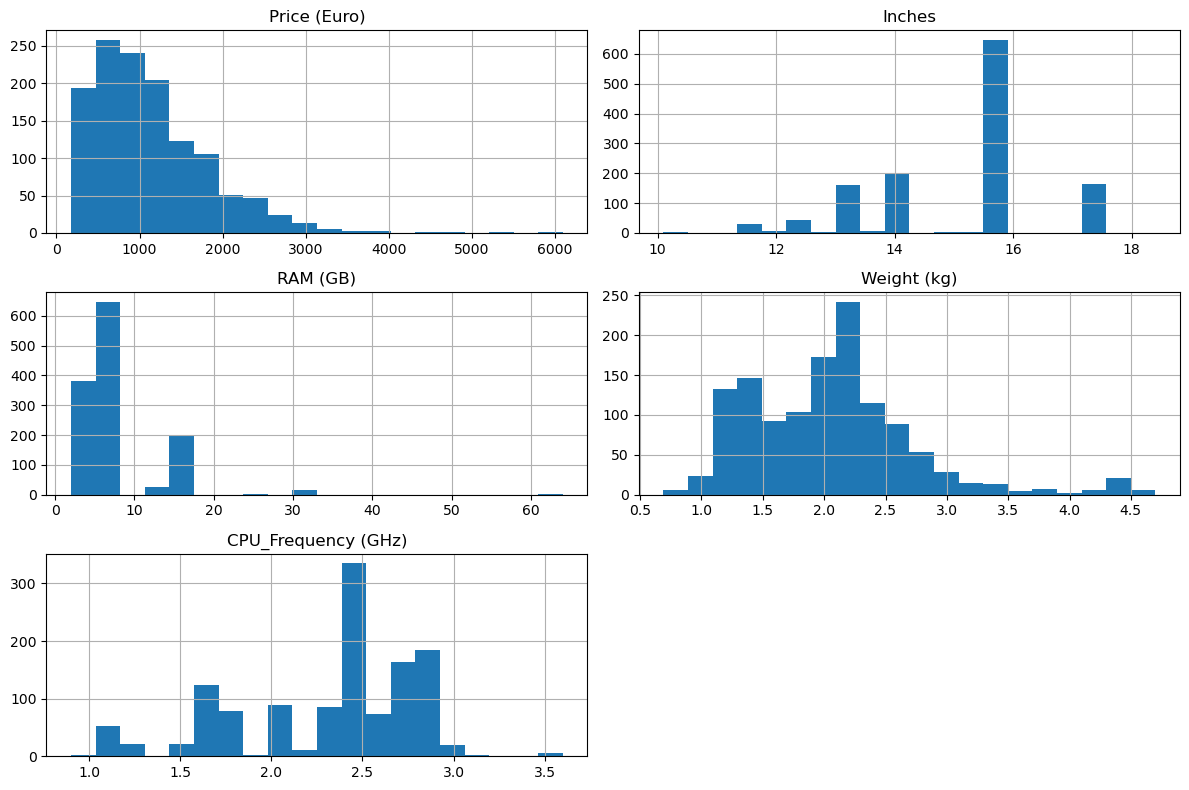

In [10]:


#1.Univariate Analysis
# Numerical
# Univariate Analysis - Numerical Columns
df[['Price (Euro)', 'Inches', 'RAM (GB)', 'Weight (kg)', 'CPU_Frequency (GHz)']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


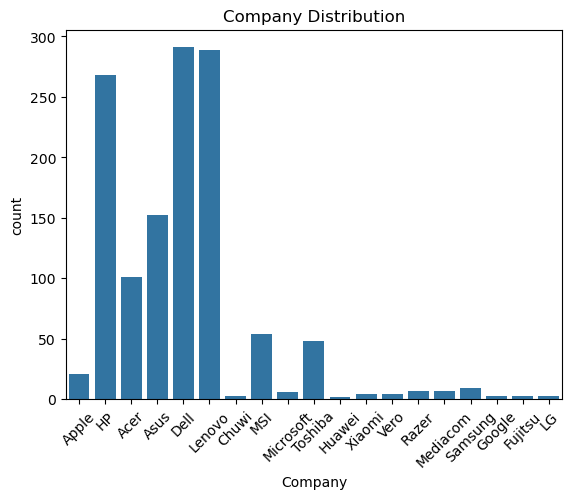

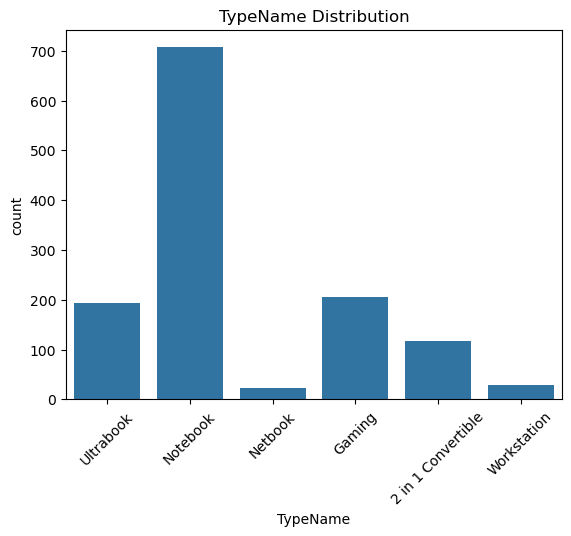

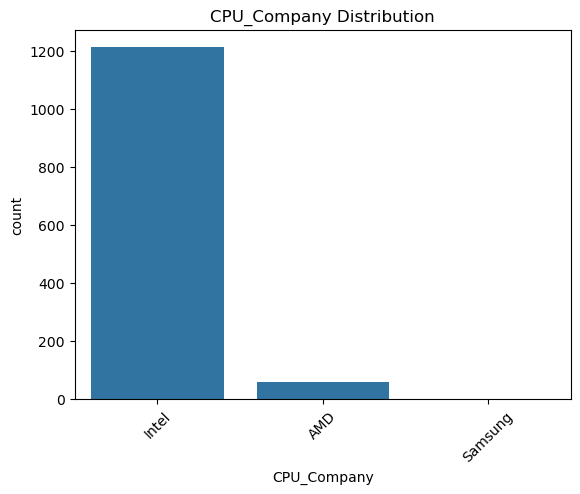

In [11]:
# Categorical
categorical_features = ['Company', 'TypeName', 'CPU_Company']
for col in categorical_features:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
    plt.show()

Text(0.5, 1.0, 'RAM vs Price')

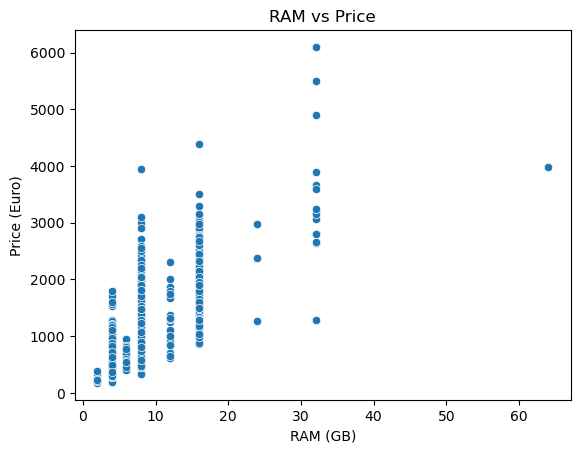

In [12]:
# 2. Bivariate Analysis
# Numerical vs Target
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)')
plt.title("RAM vs Price")




Text(0.5, 1.0, 'Price Distribution by Company')

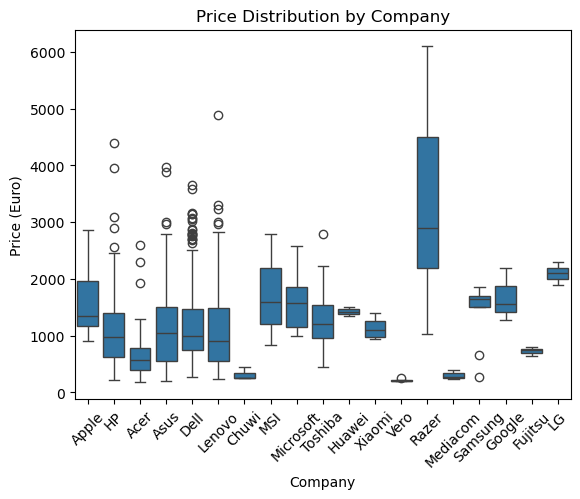

In [13]:
# Boxplot for Categorical vs Price
sns.boxplot(data=df, x='Company', y='Price (Euro)')
plt.xticks(rotation=45)
plt.title("Price Distribution by Company")

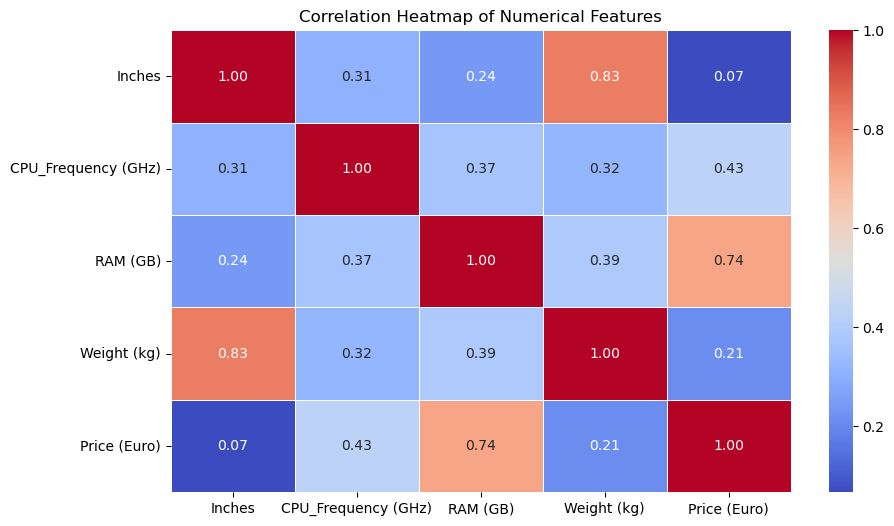

In [14]:
# 4.3 Multivariate Analysis
#We examine correlations among numerical variables to identify multicollinearity or strong relationships.
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


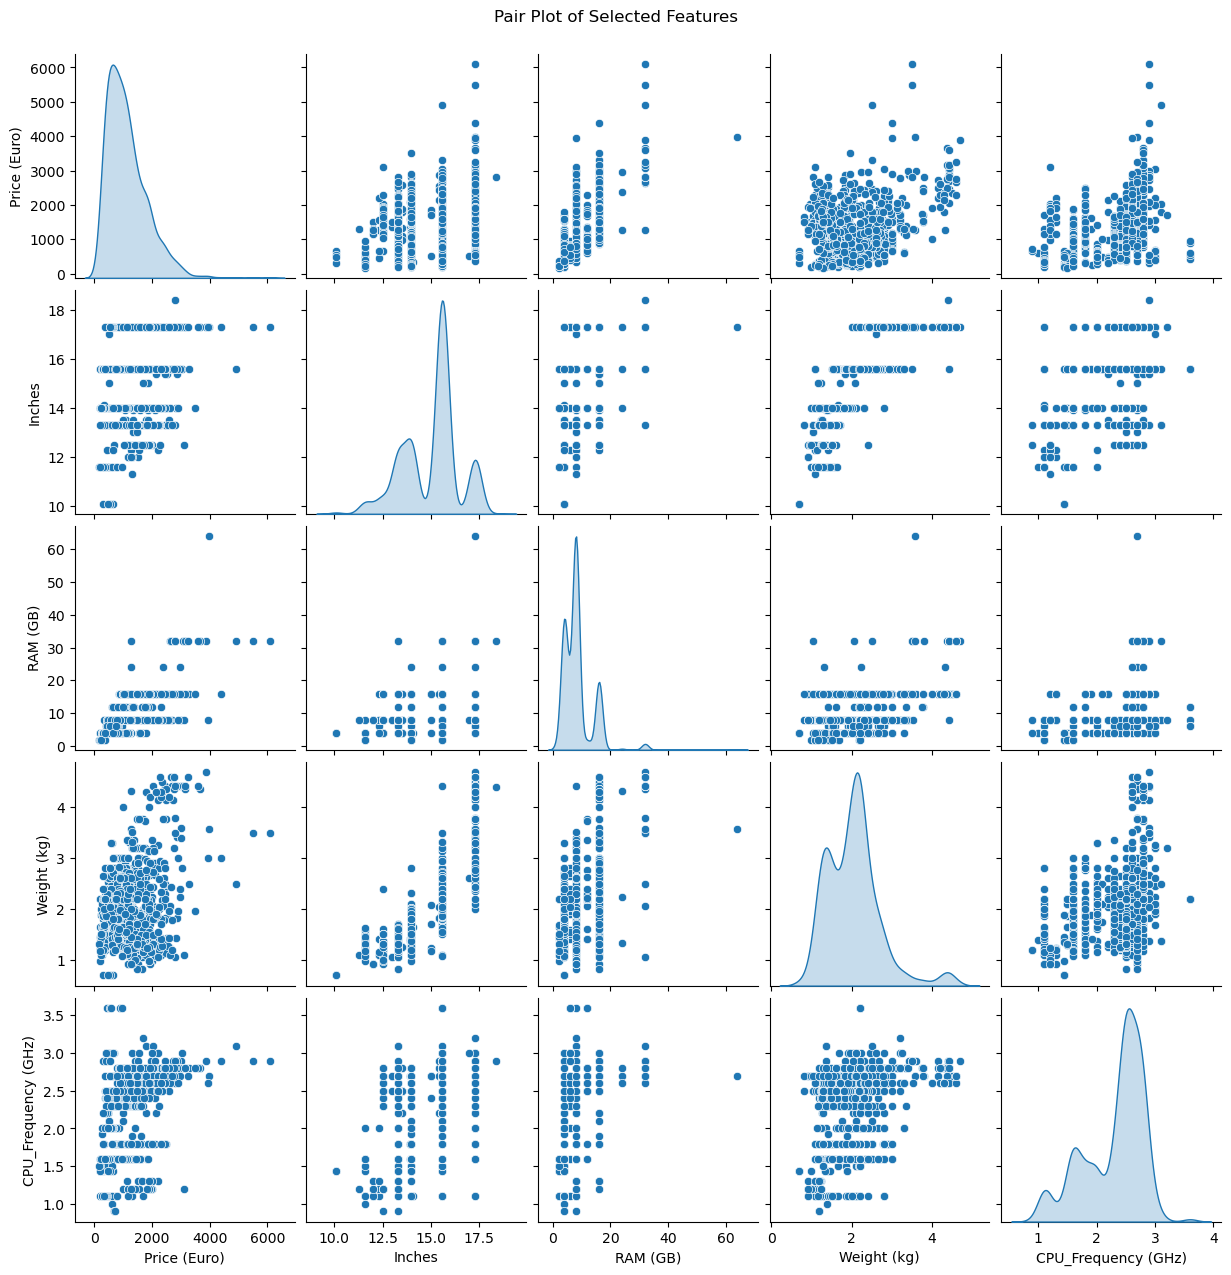

In [15]:
####  4.2 Pair Plot

#Pair plots help us visually understand relationships between multiple variables, especially with the target variable (`Price (Euro)`).

# Only include relevant numerical features to reduce clutter
sns.pairplot(df[['Price (Euro)', 'Inches', 'RAM (GB)', 'Weight (kg)', 'CPU_Frequency (GHz)']], diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


In [16]:
print ("Multivariate analysis reveals strong correlations between features like RAM, CPU Frequency, and Price. ")
print("We’ll use this insight during feature selection and modeling.")


Multivariate analysis reveals strong correlations between features like RAM, CPU Frequency, and Price. 
We’ll use this insight during feature selection and modeling.


In [17]:
print("Part 3: Data Cleaning.")
print("Ensure the dataset is clean, consistent, and ready for analysis.")
print("Steps.")
print("Handle missing values in numerical and categorical columns using appropriate methods like mean imputation or mode replacement.")
print("Remove duplicate rows.")
print("Standardize categorical values to ensure consistency.")

Part 3: Data Cleaning.
Ensure the dataset is clean, consistent, and ready for analysis.
Steps.
Handle missing values in numerical and categorical columns using appropriate methods like mean imputation or mode replacement.
Remove duplicate rows.
Standardize categorical values to ensure consistency.


In [18]:
# Step 1: Handle Missing Values
# 3.1 Handling Missing Values

#We check for missing values in the dataset and fill them using:
#- **Mean** for numerical features
#- **Mode** for categorical features


# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])




Missing values per column:
 Series([], dtype: int64)


In [19]:
# Fill missing values if any
# Numerical columns: fill with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Categorical columns: fill with mode
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [20]:
#Step 2: Remove Duplicate Rows
####  Removing Duplicate Rows

#We check for any duplicate entries in the dataset and remove them to ensure data uniqueness.
# Count and remove duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

# Drop duplicates if found
df.drop_duplicates(inplace=True)
print(f"New dataset shape: {df.shape}")



Duplicate rows found: 0
New dataset shape: (1275, 15)


In [21]:
#  Standardize Categorical Values.
### 🔸 3.3 Standardizing Categorical Values

#To avoid inconsistency in categories (e.g., 'windows 10' vs 'Windows 10'), we:
#- Remove extra spaces
#- Convert all text to lowercase

# Strip whitespace and lowercase all string values
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()






In [22]:
# Check unique values in a few important categorical columns
for col in ['company', 'opsys', 'cpu_company', 'gpu_company']:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'company':


KeyError: 'company'

In [23]:
#Standardize Column Names
df.columns = df.columns.str.strip().str.lower()



In [24]:
# Check unique values in a few important categorical columns
for col in ['company', 'opsys', 'cpu_company', 'gpu_company']:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'company':
['apple' 'hp' 'acer' 'asus' 'dell' 'lenovo' 'chuwi' 'msi' 'microsoft'
 'toshiba' 'huawei' 'xiaomi' 'vero' 'razer' 'mediacom' 'samsung' 'google'
 'fujitsu' 'lg']

Unique values in 'opsys':
['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']

Unique values in 'cpu_company':
['intel' 'amd' 'samsung']

Unique values in 'gpu_company':
['intel' 'amd' 'nvidia' 'arm']


In [25]:
print("Data cleaning completed successfully:")
print("- All missing values have been handled.")
print("- Duplicate rows removed.")
print("- Categorical string values standardized.")

print("The dataset is now ready for feature engineering and preprocessing.")


Data cleaning completed successfully:
- All missing values have been handled.
- Duplicate rows removed.
- Categorical string values standardized.
The dataset is now ready for feature engineering and preprocessing.


In [26]:
print("Part 4: Data Preprocessing")

print("Now that the data is clean, we will prepare it for machine learning.")
print("This includes:")
print("1. Encode categorical variables using one-hot encoding for nominal features and label encoding for ordinal features.")
print("2. Scale numerical features (Inches, CPU_Frequency, RAM (GB), Weight (kg)) for uniformity.")
print("3. Identify and handle outliers in numerical columns.")
print("4. Transform or engineer features to improve data representation (e.g., create separate columns for HDD and SSD storage from Memory).")

Part 4: Data Preprocessing
Now that the data is clean, we will prepare it for machine learning.
This includes:
1. Encode categorical variables using one-hot encoding for nominal features and label encoding for ordinal features.
2. Scale numerical features (Inches, CPU_Frequency, RAM (GB), Weight (kg)) for uniformity.
3. Identify and handle outliers in numerical columns.
4. Transform or engineer features to improve data representation (e.g., create separate columns for HDD and SSD storage from Memory).


In [27]:
#Step 1: Feature Engineering — Split Memory into SSD and HDD

print( "4.1 Feature Transformation: Memory → SSD & HDD")

print("The original memory column is a mixed-type string (e.g., 128GB SSD, 1TB HDD + 256GB SSD)")

print("We will extract:")
print("- `HDD` in GB")
print("- `SSD` in GB")


4.1 Feature Transformation: Memory → SSD & HDD
The original memory column is a mixed-type string (e.g., 128GB SSD, 1TB HDD + 256GB SSD)
We will extract:
- `HDD` in GB
- `SSD` in GB


In [28]:
print( " Feature Transformation: Memory → SSD & HDD")
import re

def extract_storage(val):
    val = val.lower().replace('tb', '000').replace('gb', '')
    hdd, ssd = 0, 0
    for part in val.split('+'):
        part = part.strip()
        if 'hdd' in part:
            hdd += int(re.findall(r'\d+', part)[0])
        elif 'ssd' in part or 'flash' in part:
            ssd += int(re.findall(r'\d+', part)[0])
    return pd.Series([hdd, ssd])

df[['hdd', 'ssd']] = df['memory'].apply(extract_storage)
df.drop('memory', axis=1, inplace=True)


 Feature Transformation: Memory → SSD & HDD


In [29]:
#Rename columns to uppercase if needed
df.rename(columns={'hdd': 'HDD', 'ssd': 'SSD'}, inplace=True)



In [30]:
print("Handle Outliers" )
print(" 4.2 Outlier Handling")

print("We identify outliers in numerical columns using the IQR method and optionally remove or cap them.")


Handle Outliers
 4.2 Outlier Handling
We identify outliers in numerical columns using the IQR method and optionally remove or cap them.


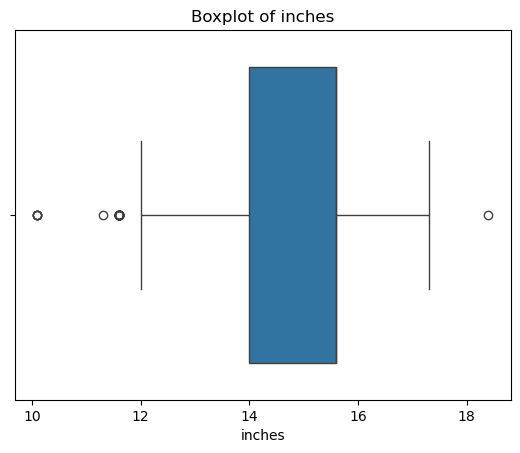

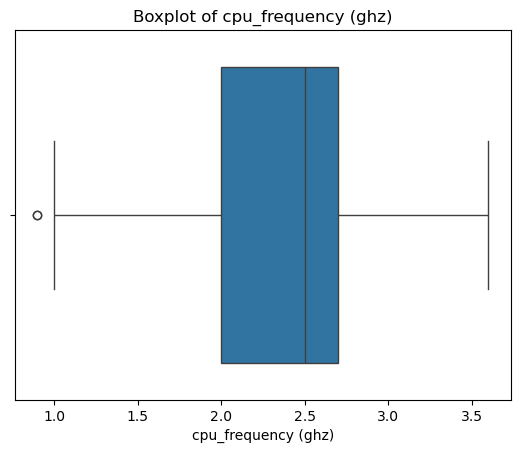

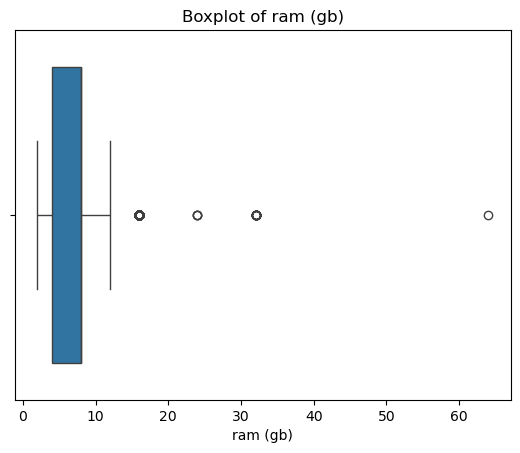

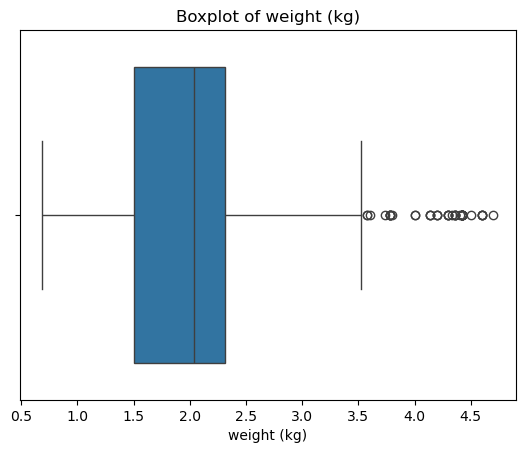

In [31]:
#Handle Outliers
 #4.2 Outlier Handling
#We identify outliers in numerical columns using the IQR method and optionally remove or cap them.

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers
num_cols = ['inches', 'cpu_frequency (ghz)', 'ram (gb)', 'weight (kg)']

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [32]:
print("Encode Categorical Variables")
print("We apply:")
print("- **Label Encoding** for ordinal columns (e.g., OS if ordered)")
print("- **One-Hot Encoding** for nominal columns (e.g., company, gpu_company)")


Encode Categorical Variables
We apply:
- **Label Encoding** for ordinal columns (e.g., OS if ordered)
- **One-Hot Encoding** for nominal columns (e.g., company, gpu_company)


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Define X and y
X = df.drop('price (euro)', axis=1)
y = df['price (euro)']

# Define categorical and numerical columns
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply One-Hot Encoding to categorical features
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='passthrough')


In [34]:
# Check transformed feature shape (optional)
X_transformed = preprocessor.fit_transform(X)
print("Shape after preprocessing:", X_transformed.shape)


Shape after preprocessing: (1275, 860)


In [35]:
print("Scale Numerical Features")
###   Scale Numerical Features

print("To bring all numeric columns to a similar range, we scale:")
print("- inches, cpu_frequency (ghz), ram (gb), weight (kg), hdd, ssd")


Scale Numerical Features
To bring all numeric columns to a similar range, we scale:
- inches, cpu_frequency (ghz), ram (gb), weight (kg), hdd, ssd


In [36]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [37]:
#Step-by-Step: How to Check If Preprocessing Works
# 1. Fit & Transform the Data
# Fit and transform the feature matrix X
X_transformed = preprocessor.fit_transform(X)

# Check shape and type
print("Transformed shape:", X_transformed.shape)
print("Type:", type(X_transformed))


Transformed shape: (1275, 860)
Type: <class 'numpy.ndarray'>


In [38]:
# Check First Row of the Transformed Data
import pandas as pd

# Just check first row as DataFrame
pd.DataFrame(X_transformed).head(1)


,0,1,2,3,4,5,6,7,8,9,...,850,851,852,853,854,855,856,857,858,859
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.205746,-0.005918,-0.086499,-1.00238,-0.797521,-0.33867


In [39]:
# Get Feature Names
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X[categorical_features])

feature_names = encoder.get_feature_names_out(categorical_features)
print(feature_names[:10])  # Print first 10


['company_acer' 'company_apple' 'company_asus' 'company_chuwi'
 'company_dell' 'company_fujitsu' 'company_google' 'company_hp'
 'company_huawei' 'company_lenovo']


In [40]:
print("Part 5: Model Building and Evaluation")

print("Now that our data is preprocessed, we will train and evaluate different regression models to predict laptop prices.")

print(" Steps:")
print("1. Split the dataset into training and testing sets.")
print("2. Train various regression models.")
print("3. Evaluate them using R², MSE, and RMSE.")
print("4. Use GridSearchCV for hyperparameter tuning.")
print("5. Select the best-performing model for deployment.")


Part 5: Model Building and Evaluation
Now that our data is preprocessed, we will train and evaluate different regression models to predict laptop prices.
 Steps:
1. Split the dataset into training and testing sets.
2. Train various regression models.
3. Evaluate them using R², MSE, and RMSE.
4. Use GridSearchCV for hyperparameter tuning.
5. Select the best-performing model for deployment.


In [41]:
#Train, evaluate, and fine-tune machine learning models for accurate price prediction.
#Steps
#Split the dataset into training and testing subsets (e.g., 80% training, 20% testing).
#Train regression models such as Linear Regression,Decision Tree,  Random Forest, and Gradient Boosting.
#Optimize models using hyperparameter tuning techniques like GridSearchCV.
#Evaluate models using metrics like R², MSE, and RMSE.
#Select the best-performing model based on evaluation results and interpretability.

In [42]:
#Train-Test Split
#Split the dataset into training and testing sets.
#Split the dataset into training and testing subsets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)




Training size: (1020, 15)
Testing size: (255, 15)


In [43]:
print("2.Train and Evaluate Multiple Models")
print("We'll test:")
print("- Linear Regression")
print("- Decision Tree")
print("- Random Forest")
print("- Gradient Boosting")

2.Train and Evaluate Multiple Models
We'll test:
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting


In [44]:
#Train regression models such as Linear Regression,Decision Tree,  Random Forest, and Gradient Boosting.


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[name] = {'R2 Score': r2, 'MSE': mse, 'RMSE': rmse}
    
    print(f"{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print('-' * 30)


Linear Regression:
  R² Score: -44345512875653582553088.0000
  MSE: 22010419700031071522960441344.00
  RMSE: 148359090385561.03
------------------------------
Decision Tree:
  R² Score: 0.7111
  MSE: 143412.63
  RMSE: 378.70
------------------------------
Random Forest:
  R² Score: 0.8879
  MSE: 55629.67
  RMSE: 235.86
------------------------------
Gradient Boosting:
  R² Score: 0.8778
  MSE: 60666.61
  RMSE: 246.31
------------------------------


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.1, 0.05]
}

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['company',
                                                                          'product',
                                                                          'typename',
                                                                          'screenresolution',
                                                                          'cpu_company',
                                                                          'cpu_type',
                                                                          'gpu_company',
                                                                          'gpu_type',
                                                                          'opsys']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['inches',
                                                                          'cpu_frequency '
                                                                          '(ghz)',
                                                                          'ram '
                                                                          '(gb)',
                                                                          'weight '
                                                                          '(kg)',
                                                                          'HDD',
                                                                          'SSD'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.05],
                         'regressor__max_depth': [3, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [49]:
# After fitting grid_search:
grid_search.fit(X_train, y_train)

# Now introduce the evaluation
print("🔍 Final Model Evaluation")

# Final model test evaluation
best_model = grid_search.best_estimator_
y_final_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, root_mean_squared_error

print("Final Model Performance:")
print(f"R² Score: {r2_score(y_test, y_final_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_final_pred):.2f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔍 Final Model Evaluation
Final Model Performance:
R² Score: 0.9015
RMSE: 221.08


In [48]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.1, 0.05]
}

# Create pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Run GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

#  Final model evaluation
print("🔍 Final Model Evaluation")

best_model = grid_search.best_estimator_
y_final_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, root_mean_squared_error

print(" Final Model Performance:")
print(f"R² Score: {r2_score(y_test, y_final_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_final_pred):.2f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔍 Final Model Evaluation
 Final Model Performance:
R² Score: 0.9037
RMSE: 218.65


In [50]:
#Save the trained model for deployment
import pickle

# Save the final model
with open("../model/model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Optionally save column names
#with open("../model/model_columns.pkl", "wb") as f:
    #pickle.dump(X.columns.tolist(), f)

print("🎉 Model and columns saved successfully!")


🎉 Model and columns saved successfully!


In [51]:
print(X.columns.tolist())


['company', 'product', 'typename', 'inches', 'screenresolution', 'cpu_company', 'cpu_type', 'cpu_frequency (ghz)', 'ram (gb)', 'gpu_company', 'gpu_type', 'opsys', 'weight (kg)', 'HDD', 'SSD']
